In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Display original picture

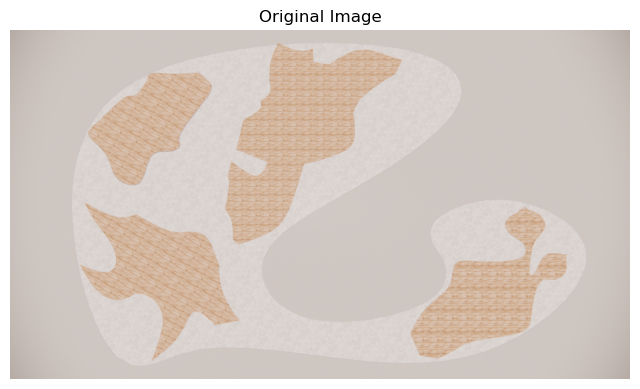

In [18]:
# Load the image
image = cv2.imread("picture.jpg")
# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Contour of the largest region

使用Meta的[Segment Anything](https://segment-anything.com/)工具，自动抠图，得到background.png, 因为单纯用python实现分割出背景白色区域有点困难，所以采用这种取巧的方法。
- total_area_ref 是整张图片的像素面积。
- area_of_interest 是最大轮廓（白色背景区域）的像素面积。

Total Area: 2058240
Large Circle Area:992152    Proportion: 48.20%


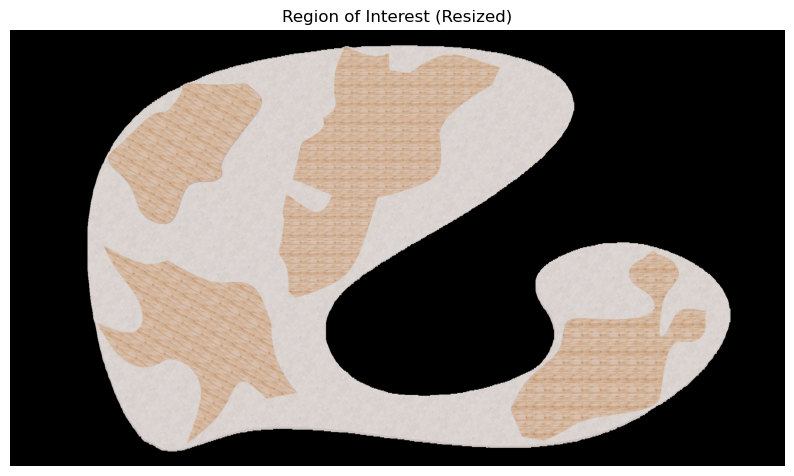

In [19]:
# Load the new reference image
ref_image = cv2.imread("background.png")
ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB

# Convert the reference image to grayscale
gray_ref_image = cv2.cvtColor(ref_image, cv2.COLOR_RGB2GRAY)

# Apply thresholding to the grayscale reference image
_, binary_ref_image = cv2.threshold(gray_ref_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary reference image
ref_contours, _ = cv2.findContours(binary_ref_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area in descending order
ref_contours_sorted = sorted(ref_contours, key=cv2.contourArea, reverse=True)

# Create a mask of the largest contour from the reference image (representing the region of interest)
mask_ref = np.zeros_like(binary_ref_image)
cv2.drawContours(mask_ref, [ref_contours_sorted[0]], 0, 255, thickness=cv2.FILLED)

# Calculate the area of the region of interest
area_of_interest = np.sum(mask_ref == 255)
total_area_ref = np.prod(mask_ref.shape)
proportion = (area_of_interest / total_area_ref) * 100

print("Total Area:", total_area_ref)
print("Large Circle Area:" + f"{area_of_interest}" + "    Proportion: " + f"{proportion:.2f}" + "%")

# Check the sizes of the images
original_shape = image.shape
ref_shape = ref_image.shape

# If the shapes are different, resize the mask to match the original image size
if original_shape != ref_shape:
    mask_ref_resized = cv2.resize(mask_ref, (original_shape[1], original_shape[0]), interpolation=cv2.INTER_NEAREST)
else:
    mask_ref_resized = mask_ref

# Overlay the resized region of interest on the original image
overlay_image_resized = cv2.bitwise_and(image, image, mask=mask_ref_resized)

plt.figure(figsize=(10, 10))
plt.imshow(overlay_image_resized)
plt.title("Region of Interest (Resized)")
plt.axis('off')
plt.show()


# Contour of the four areas

- proportion_small 是每块深色区域/白色轮廓区域的面积占比。
- proportion_small 是每块深色区域/整张图片的面积占比。

Dark Region 1 - Area 1: 150245.50
Proportions of large circle area: 15.14%    Proportions of all area: 7.30%
Dark Region 2 - Area 2: 97420.50
Proportions of large circle area: 9.82%    Proportions of all area: 4.73%
Dark Region 3 - Area 3: 91676.00
Proportions of large circle area: 9.24%    Proportions of all area: 4.45%
Dark Region 4 - Area 4: 70465.50
Proportions of large circle area: 7.10%    Proportions of all area: 3.42%


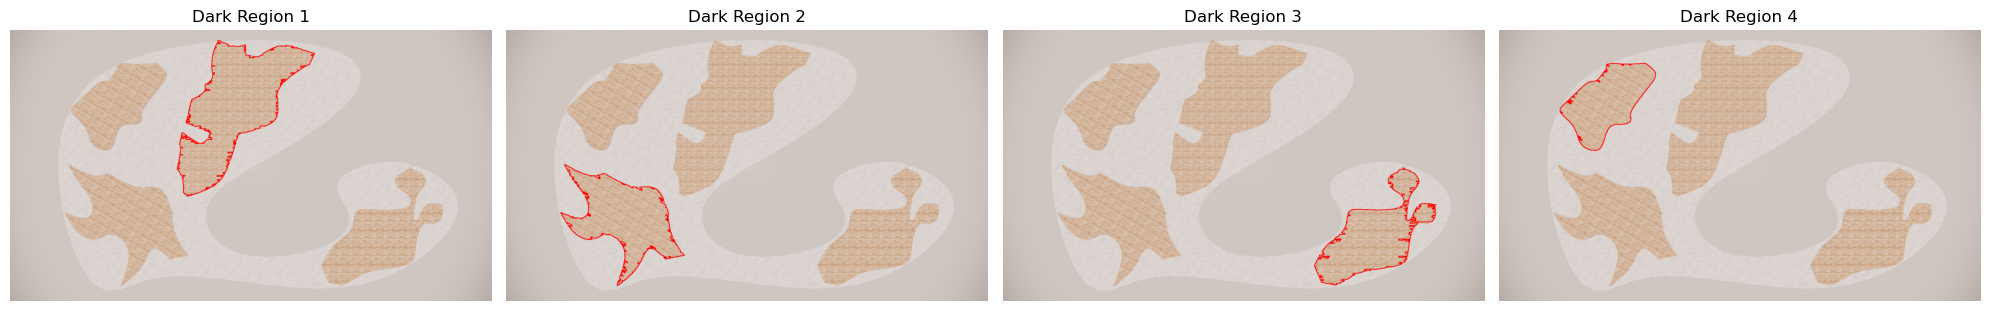

In [24]:
# Load the image again
new_image = cv2.imread("picture.jpg")
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Convert the image to grayscale
gray_image_new = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)

# Threshold the image using Otsu's method
_, binary_image_new = cv2.threshold(gray_image_new, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours_new, _ = cv2.findContours(binary_image_new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area in descending order
contours_sorted_new = sorted(contours_new, key=cv2.contourArea, reverse=True)

# Plotting the selected images: largest contour and Dark Region 1, 2, and 3
fig, axs = plt.subplots(1, 4, figsize=(20, 5))


# Images with Dark Region 1, 2, and 3
titles = ["Dark Region 1", "Dark Region 2", "Dark Region 3", "Dark Region 4"]
for i in range(0, 4):
    image_with_dark_region_new = new_image.copy()
    cv2.drawContours(image_with_dark_region_new, [contours_sorted_new[i]], -1, (255, 0, 0), 2)  # Draw in blue
    axs[i].imshow(image_with_dark_region_new)
    axs[i].set_title(titles[i])
    axs[i].axis('off')
    area = cv2.contourArea(contours_sorted_new[i])
    proportion_small = (area / area_of_interest) * 100
    proportion_big = (area / total_area_ref) * 100    
    print(f"Dark Region {i+1} - Area {i+1}: {area:.2f}")
    print(f"Proportions of large circle area: {proportion_small:.2f}%    Proportions of all area: {proportion_big:.2f}%")

plt.tight_layout()
plt.show()



# Contour of the largest region 2

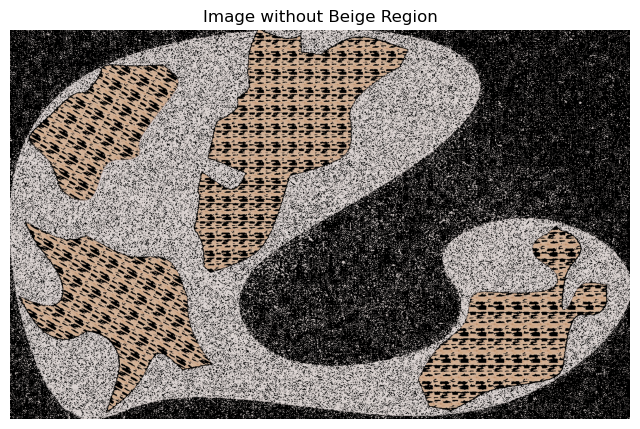

Large Circle Area: 810688
Total image area: 1592000
Proportion of large circle area (%): 50.92%


In [30]:
# Load the image
image_path = "picture2.jpg"
image2 = cv2.imread(image_path)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Convert image to HSV for better color segmentation
hsv_image = cv2.cvtColor(image2_rgb, cv2.COLOR_RGB2HSV)

# Define a range for the beige color in the image
lower_beige = np.array([10, 10, 200])
upper_beige = np.array([40, 60, 255])

# Create a mask where the beige color is
mask_beige = cv2.inRange(hsv_image, lower_beige, upper_beige)

# Invert the mask to keep non-beige regions
mask_non_beige = cv2.bitwise_not(mask_beige)

# Apply the mask to get the image without the beige region
image2_non_beige = cv2.bitwise_and(image2_rgb, image2_rgb, mask=mask_non_beige)

# Compute the area without the beige region
total_image_area_new = image2_rgb.shape[0] * image2_rgb.shape[1]
area_of_interest = np.sum(mask_non_beige == 255)
proportion_large_area = (area_of_interest / total_image_area_new) * 100

# Display the image without the beige region
plt.figure(figsize=(8, 6))
plt.imshow(image2_non_beige)
plt.title("Image without Beige Region")
plt.axis('off')
plt.show()

print("Large Circle Area:", area_of_interest)
print("Total image area:", total_image_area_new)
print(f"Proportion of large circle area (%): {proportion_large_area:.2f}%")


# Contour of the four areas 2

Dark Region 1 - Area 1: 150246.50
Proportions of large circle area: 18.53%    Proportions of all area: 9.44%
Dark Region 2 - Area 2: 97444.00
Proportions of large circle area: 12.02%    Proportions of all area: 6.12%
Dark Region 3 - Area 3: 91880.00
Proportions of large circle area: 11.33%    Proportions of all area: 5.77%
Dark Region 4 - Area 4: 70481.00
Proportions of large circle area: 8.69%    Proportions of all area: 4.43%


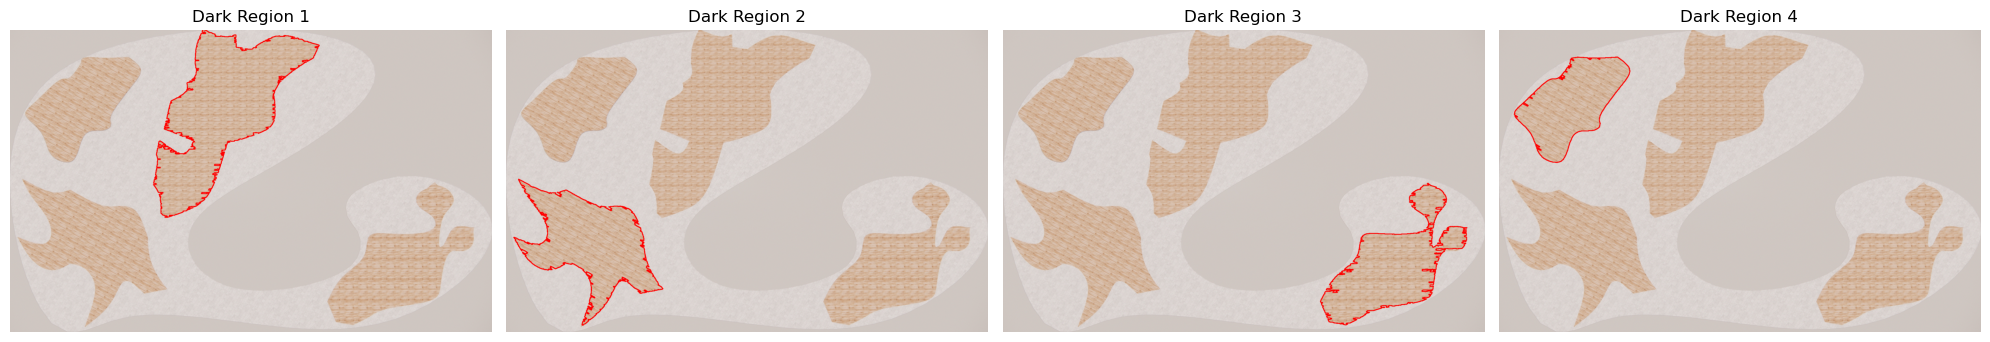

In [27]:
# Load the image again
new_image = cv2.imread("picture2.jpg")
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Convert the image to grayscale
gray_image_new = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)

# Threshold the image using Otsu's method
_, binary_image_new = cv2.threshold(gray_image_new, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours_new, _ = cv2.findContours(binary_image_new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area in descending order
contours_sorted_new = sorted(contours_new, key=cv2.contourArea, reverse=True)

# Plotting the selected images: largest contour and Dark Region 1, 2, and 3
fig, axs = plt.subplots(1, 4, figsize=(20, 5))


# Images with Dark Region 1, 2, and 3
titles = ["Dark Region 1", "Dark Region 2", "Dark Region 3", "Dark Region 4"]
for i in range(0, 4):
    image_with_dark_region_new = new_image.copy()
    cv2.drawContours(image_with_dark_region_new, [contours_sorted_new[i]], -1, (255, 0, 0), 2)  # Draw in blue
    axs[i].imshow(image_with_dark_region_new)
    axs[i].set_title(titles[i])
    axs[i].axis('off')
    area = cv2.contourArea(contours_sorted_new[i])
    proportion_small = (area / area_of_interest) * 100
    proportion_big = (area / total_image_area_new) * 100    
    print(f"Dark Region {i+1} - Area {i+1}: {area:.2f}")
    print(f"Proportions of large circle area: {proportion_small:.2f}%    Proportions of all area: {proportion_big:.2f}%")

plt.tight_layout()
plt.show()
